In [1]:
import numpy as np
import pandas as pd
import statistics as st
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [2]:
df = pd.read_csv('./Datasets/stats_pl.csv')

In [3]:
df #agrupar os times com maiores vitórias > 20

,team,wins,losses,goals,total_yel_card,total_red_card,total_scoring_att,ontarget_scoring_att,hit_woodwork,att_hd_goal,...,total_cross,corner_taken,touches,big_chance_missed,clearance_off_line,dispossessed,penalty_save,total_high_claim,punches,season
0,Manchester United,28.0,5.0,83.0,60.0,1.0,698.0,256.0,21.0,12.0,...,918.0,258.0,25686.0,NaN,1.0,NaN,2.0,37.0,25.0,2006-2007
1,Chelsea,24.0,3.0,64.0,62.0,4.0,636.0,216.0,14.0,16.0,...,897.0,231.0,24010.0,NaN,2.0,NaN,1.0,74.0,22.0,2006-2007
2,Liverpool,20.0,10.0,57.0,44.0,0.0,668.0,214.0,15.0,8.0,...,1107.0,282.0,24150.0,NaN,1.0,NaN,0.0,51.0,27.0,2006-2007
3,Arsenal,19.0,8.0,63.0,59.0,3.0,638.0,226.0,19.0,10.0,...,873.0,278.0,25592.0,NaN,1.0,NaN,0.0,88.0,27.0,2006-2007
4,Tottenham Hotspur,17.0,12.0,57.0,48.0,3.0,520.0,184.0,6.0,5.0,...,796.0,181.0,22200.0,NaN,2.0,NaN,0.0,51.0,24.0,2006-2007
5,Bolton Wanderers,16.0,14.0,47.0,84.0,4.0,404.0,120.0,7.0,10.0,...,942.0,217.0,18932.0,NaN,6.0,NaN,2.0,44.0,21.0,2006-2007
6,Reading,16.0,15.0,52.0,38.0,3.0,419.0,132.0,8.0,15.0,...,1067.0,280.0,18017.0,NaN,2.0,NaN,0.0,63.0,21.0,2006-2007
7,Blackburn Rovers,15.0,16.0,52.0,77.0,6.0,478.0,155.0,5.0,12.0,...,911.0,205.0,20812.0,NaN,8.0,NaN,5.0,56.0,25.0,2006-2007
8,Everton,15.0,10.0,52.0,65.0,2.0,465.0,153.0,9.0,9.0,...,867.0,208.0,19250.0,NaN,2.0,NaN,1.0,83.0,15.0,2006-2007
9,Portsmouth,14.0,12.0,45.0,48.0,1.0,525.0,186.0,9.0,13.0,...,783.0,247.0,19377.0,NaN,4.0,NaN,2.0,79.0,30.0,2006-2007


## Calculando a média e a variância do Dataset

In [4]:
df.mean()

wins                       14.150000
losses                     14.150000
goals                      51.062500
total_yel_card             61.079167
total_red_card              2.862500
total_scoring_att         514.241667
ontarget_scoring_att      168.116667
hit_woodwork               12.283333
att_hd_goal                 9.016667
att_pen_goal                3.650000
att_freekick_goal           1.495833
att_ibox_goal              43.341667
att_obox_goal               7.741667
goal_fastbreak              2.983333
total_offside              86.291667
clean_sheet                10.945833
goals_conceded             51.062500
saves                      51.736364
outfielder_block          132.133333
interception              555.179167
total_tackle              762.133333
last_man_tackle             5.900000
total_clearance          1252.416667
head_clearance            675.236364
own_goals                   1.966667
penalty_conceded            4.750000
pen_goals_conceded          3.650000
t

In [5]:
df.var()

wins                    3.627029e+01
losses                  3.132469e+01
goals                   2.625526e+02
total_yel_card          1.015711e+02
total_red_card          3.248797e+00
total_scoring_att       9.212000e+03
ontarget_scoring_att    1.501476e+03
hit_woodwork            2.324156e+01
att_hd_goal             1.338884e+01
att_pen_goal            4.211715e+00
att_freekick_goal       1.782409e+00
att_ibox_goal           2.051966e+02
att_obox_goal           1.338905e+01
goal_fastbreak          5.849093e+00
total_offside           4.299899e+02
clean_sheet             1.722300e+01
goals_conceded          1.744940e+02
saves                   3.181674e+03
outfielder_block        1.020275e+03
interception            1.998350e+04
total_tackle            1.096297e+04
last_man_tackle         2.955481e+01
total_clearance         1.070817e+05
head_clearance          3.347567e+04
own_goals               2.166248e+00
penalty_conceded        5.117155e+00
pen_goals_conceded      3.726360e+00
t

## Calculando as medidas de dispersão de algumas colunas

In [6]:
df["head_clearance"].describe()

count     220.000000
mean      675.236364
std       182.963575
min       308.000000
25%       537.000000
50%       635.000000
75%       801.250000
max      1183.000000
Name: head_clearance, dtype: float64

In [7]:
df['corner_taken'].mean()

207.19166666666666

In [8]:
df['corner_taken'].median()

201.0

In [9]:
df['corner_taken'].mode()

0    181.0
dtype: float64

In [10]:
df['corner_taken'].std()

35.93317736722322

In [11]:
df['own_goals'].mean()

1.9666666666666666

In [12]:
df['own_goals'].median()

2.0

In [13]:
df['own_goals'].mode()

0    2.0
dtype: float64

In [14]:
df['own_goals'].std()

1.471818010701334

In [15]:
df['last_man_tackle'].mean()

5.9

In [16]:
df['last_man_tackle'].median()

4.0

In [17]:
df['last_man_tackle'].mode()

0    4.0
dtype: float64

In [18]:
df['last_man_tackle'].std()

5.436433731361137

## Plotando os Boxplot de alguma colunas

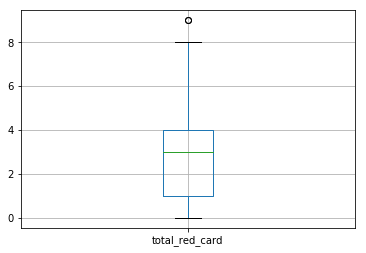

In [19]:

df.boxplot(column='total_red_card')



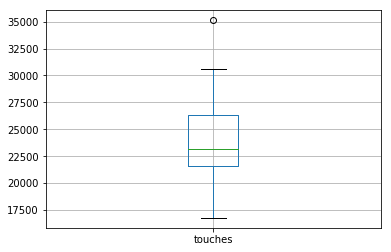

In [20]:
df.boxplot(column='touches')

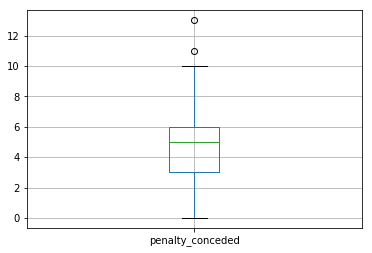

In [21]:
df.boxplot(column='penalty_conceded')

# Gráficos

## Gráfico de dispersão

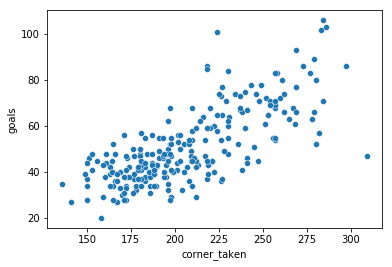

In [22]:
sns.scatterplot(data=df, x="corner_taken", y="goals")

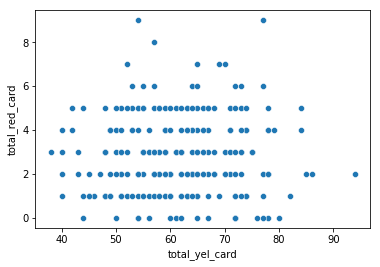

In [23]:
sns.scatterplot(data=df, x="total_yel_card", y="total_red_card")

## Histograma

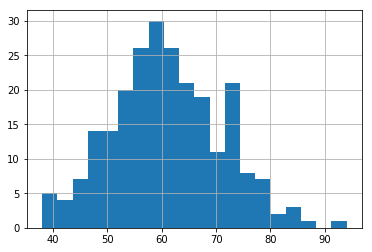

In [24]:
hist = df['total_yel_card'].hist(bins=20)

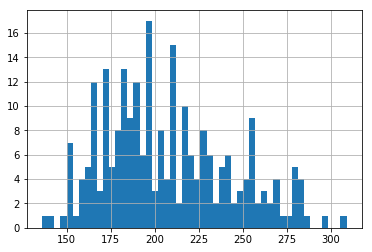

In [25]:
hist = df['corner_taken'].hist(bins=50)

## Gráfico de linha e Gráfico de barra

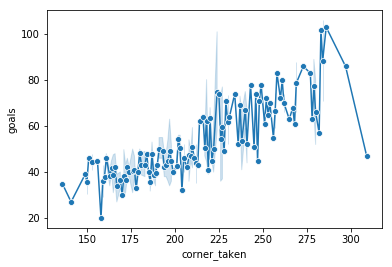

In [26]:
sns.lineplot(data=df, x="corner_taken", y="goals", marker='o')

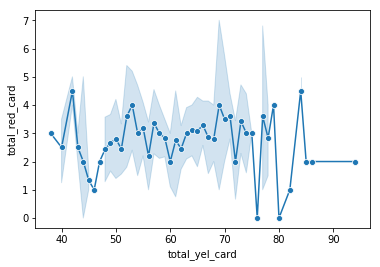

In [27]:
sns.lineplot(data=df, x="total_yel_card", y="total_red_card", marker='o')

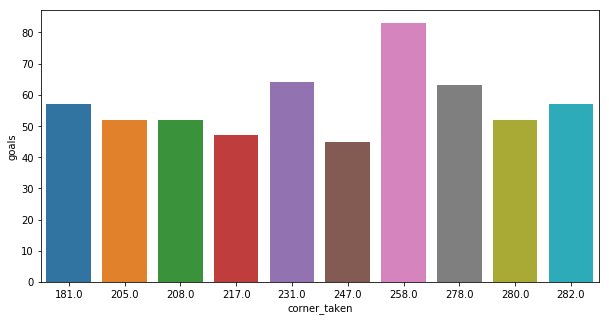

In [28]:
plt.figure(figsize=(10,5))
sns.barplot(data=df[:10], x="corner_taken", y="goals")


## Matriz de correlação

In [29]:
corr = df.corr()
corr

,wins,losses,goals,total_yel_card,total_red_card,total_scoring_att,ontarget_scoring_att,hit_woodwork,att_hd_goal,att_pen_goal,...,backward_pass,total_cross,corner_taken,touches,big_chance_missed,clearance_off_line,dispossessed,penalty_save,total_high_claim,punches
wins,1.000000,-0.890199,0.899236,-0.211276,-0.084818,0.753944,0.825577,0.512426,0.354752,0.398314,...,0.622935,0.208196,0.702131,0.704645,0.604178,-0.316998,0.260774,-0.032365,-0.162252,0.007351
losses,-0.890199,1.000000,-0.825820,0.235155,0.116112,-0.710323,-0.775273,-0.490826,-0.373599,-0.379356,...,-0.584510,-0.226708,-0.673469,-0.656575,-0.635046,0.293553,-0.273270,0.017236,0.147711,-0.010721
goals,0.899236,-0.825820,1.000000,-0.235392,-0.084373,0.788062,0.882988,0.564536,0.442670,0.492004,...,0.625073,0.216077,0.737691,0.733838,0.650628,-0.268003,0.269028,-0.000698,-0.222321,0.017450
total_yel_card,-0.211276,0.235155,-0.235392,1.000000,0.033770,-0.253648,-0.265842,-0.128863,-0.089670,-0.095150,...,-0.227163,-0.144025,-0.240047,-0.246781,-0.248291,-0.047345,-0.137412,-0.014418,0.094843,-0.073962
total_red_card,-0.084818,0.116112,-0.084373,0.033770,1.000000,-0.028250,-0.094543,-0.127432,-0.014242,0.038967,...,-0.106229,0.020976,-0.090034,-0.067673,0.032303,0.112337,-0.001112,0.062797,0.037623,0.089275
total_scoring_att,0.753944,-0.710323,0.788062,-0.253648,-0.028250,1.000000,0.938888,0.605026,0.271458,0.353282,...,0.521721,0.363540,0.794554,0.711154,0.726253,-0.174188,0.424606,-0.003246,-0.101241,0.138381
ontarget_scoring_att,0.825577,-0.775273,0.882988,-0.265842,-0.094543,0.938888,1.000000,0.626005,0.311790,0.395763,...,0.631762,0.257334,0.786692,0.767850,0.735622,-0.225950,0.373564,-0.005862,-0.166715,0.096687
hit_woodwork,0.512426,-0.490826,0.564536,-0.128863,-0.127432,0.605026,0.626005,1.000000,0.236210,0.191067,...,0.429798,0.170618,0.536658,0.531672,0.587715,-0.128247,0.162003,0.042172,-0.178729,-0.049829
att_hd_goal,0.354752,-0.373599,0.442670,-0.089670,-0.014242,0.271458,0.311790,0.236210,1.000000,0.132276,...,0.081814,0.299689,0.296625,0.173216,0.219387,-0.075413,0.108598,0.017676,-0.048019,-0.115129
att_pen_goal,0.398314,-0.379356,0.492004,-0.095150,0.038967,0.353282,0.395763,0.191067,0.132276,1.000000,...,0.186675,0.056393,0.332663,0.244434,0.308450,-0.094283,0.146317,0.020114,-0.017222,0.127869


In [30]:
#corr.style.background_gradient(cmap='coolwarm') # mapa de correlação

## Métodos de limpeza e transformação

In [31]:
df

,team,wins,losses,goals,total_yel_card,total_red_card,total_scoring_att,ontarget_scoring_att,hit_woodwork,att_hd_goal,...,total_cross,corner_taken,touches,big_chance_missed,clearance_off_line,dispossessed,penalty_save,total_high_claim,punches,season
0,Manchester United,28.0,5.0,83.0,60.0,1.0,698.0,256.0,21.0,12.0,...,918.0,258.0,25686.0,NaN,1.0,NaN,2.0,37.0,25.0,2006-2007
1,Chelsea,24.0,3.0,64.0,62.0,4.0,636.0,216.0,14.0,16.0,...,897.0,231.0,24010.0,NaN,2.0,NaN,1.0,74.0,22.0,2006-2007
2,Liverpool,20.0,10.0,57.0,44.0,0.0,668.0,214.0,15.0,8.0,...,1107.0,282.0,24150.0,NaN,1.0,NaN,0.0,51.0,27.0,2006-2007
3,Arsenal,19.0,8.0,63.0,59.0,3.0,638.0,226.0,19.0,10.0,...,873.0,278.0,25592.0,NaN,1.0,NaN,0.0,88.0,27.0,2006-2007
4,Tottenham Hotspur,17.0,12.0,57.0,48.0,3.0,520.0,184.0,6.0,5.0,...,796.0,181.0,22200.0,NaN,2.0,NaN,0.0,51.0,24.0,2006-2007
5,Bolton Wanderers,16.0,14.0,47.0,84.0,4.0,404.0,120.0,7.0,10.0,...,942.0,217.0,18932.0,NaN,6.0,NaN,2.0,44.0,21.0,2006-2007
6,Reading,16.0,15.0,52.0,38.0,3.0,419.0,132.0,8.0,15.0,...,1067.0,280.0,18017.0,NaN,2.0,NaN,0.0,63.0,21.0,2006-2007
7,Blackburn Rovers,15.0,16.0,52.0,77.0,6.0,478.0,155.0,5.0,12.0,...,911.0,205.0,20812.0,NaN,8.0,NaN,5.0,56.0,25.0,2006-2007
8,Everton,15.0,10.0,52.0,65.0,2.0,465.0,153.0,9.0,9.0,...,867.0,208.0,19250.0,NaN,2.0,NaN,1.0,83.0,15.0,2006-2007
9,Portsmouth,14.0,12.0,45.0,48.0,1.0,525.0,186.0,9.0,13.0,...,783.0,247.0,19377.0,NaN,4.0,NaN,2.0,79.0,30.0,2006-2007


## Verificando se existe dados faltantes 

In [32]:
df.isnull() # Verificamos se existem valores vazios, nan, None

,team,wins,losses,goals,total_yel_card,total_red_card,total_scoring_att,ontarget_scoring_att,hit_woodwork,att_hd_goal,...,total_cross,corner_taken,touches,big_chance_missed,clearance_off_line,dispossessed,penalty_save,total_high_claim,punches,season
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False


In [33]:
df.dropna() # Com esse método é possível dropar as linhas que possuem esses valores

,team,wins,losses,goals,total_yel_card,total_red_card,total_scoring_att,ontarget_scoring_att,hit_woodwork,att_hd_goal,...,total_cross,corner_taken,touches,big_chance_missed,clearance_off_line,dispossessed,penalty_save,total_high_claim,punches,season
80,Manchester United,23.0,4.0,78.0,56.0,3.0,618.0,212.0,15.0,18.0,...,1005.0,243.0,26671.0,50.0,2.0,471.0,0.0,45.0,16.0,2010-2011
81,Chelsea,21.0,9.0,69.0,59.0,1.0,745.0,244.0,21.0,12.0,...,995.0,257.0,27426.0,70.0,7.0,573.0,1.0,84.0,22.0,2010-2011
82,Manchester City,21.0,9.0,60.0,71.0,5.0,546.0,177.0,16.0,4.0,...,762.0,222.0,25892.0,51.0,2.0,520.0,1.0,66.0,27.0,2010-2011
83,Arsenal,19.0,8.0,72.0,65.0,6.0,654.0,238.0,23.0,9.0,...,928.0,252.0,28629.0,88.0,4.0,601.0,2.0,56.0,25.0,2010-2011
84,Liverpool,17.0,14.0,59.0,63.0,2.0,582.0,205.0,12.0,8.0,...,824.0,212.0,24941.0,43.0,6.0,493.0,0.0,74.0,26.0,2010-2011
85,Tottenham Hotspur,16.0,8.0,55.0,51.0,2.0,657.0,191.0,15.0,10.0,...,954.0,256.0,25438.0,51.0,6.0,560.0,2.0,68.0,50.0,2010-2011
86,Everton,13.0,10.0,51.0,55.0,5.0,580.0,181.0,8.0,14.0,...,1019.0,245.0,22628.0,47.0,2.0,525.0,0.0,51.0,30.0,2010-2011
87,Stoke City,13.0,18.0,46.0,68.0,2.0,482.0,143.0,20.0,11.0,...,766.0,191.0,18195.0,39.0,5.0,449.0,2.0,64.0,20.0,2010-2011
88,Aston Villa,12.0,14.0,48.0,71.0,2.0,506.0,165.0,19.0,13.0,...,973.0,230.0,22681.0,57.0,7.0,350.0,0.0,30.0,25.0,2010-2011
89,Bolton Wanderers,12.0,16.0,52.0,67.0,5.0,570.0,173.0,9.0,10.0,...,850.0,197.0,21351.0,42.0,10.0,418.0,2.0,46.0,22.0,2010-2011


## Agrupamento K-means

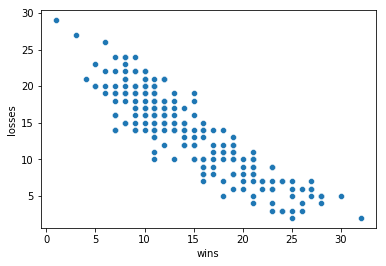

In [34]:
sns.scatterplot(data=df, x="wins", y="losses")

In [35]:
df_group1 = df[["wins", "losses"]]

In [36]:
kmeans1 = KMeans(n_clusters=5)

In [37]:
kmeans1.fit(df_group1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [38]:
kmeans1.labels_

array([3, 3, 1, 1, 4, 4, 4, 0, 4, 4, 0, 2, 4, 0, 0, 2, 2, 2, 0, 2, 3, 3,
       3, 1, 4, 4, 4, 4, 4, 0, 0, 2, 0, 0, 2, 0, 2, 2, 2, 2, 3, 3, 3, 1,
       4, 4, 0, 4, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 3, 3, 1, 1, 4, 1,
       4, 4, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 3, 1, 1, 1, 4, 4, 4, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 3, 3, 1, 1, 4, 4, 4, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 2, 2, 0, 2, 3, 1, 1, 1, 1, 4, 4, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 2, 2, 2, 3, 3, 3, 1, 1, 1, 4, 0, 4, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 0, 3, 1, 1, 1, 4, 4, 4, 4, 4, 0, 0, 0, 2, 0, 2, 2,
       2, 2, 2, 0, 3, 1, 4, 4, 1, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       0, 2, 3, 3, 1, 1, 1, 1, 4, 0, 2, 0, 0, 2, 0, 0, 2, 0, 2, 2, 2, 2,
       3, 3, 1, 1, 1, 4, 4, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2, 2],
      dtype=int32)

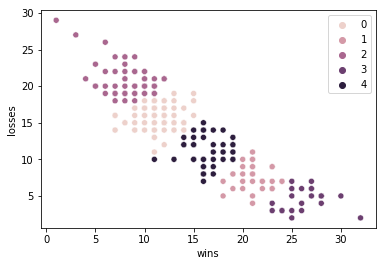

In [39]:
sns.scatterplot(data=df_group1, x="wins", y="losses", hue=kmeans1.labels_)

In [40]:
df_group2 = df[["goals", "ontarget_scoring_att"]]

In [41]:
kmeans2 = KMeans(n_clusters=5)

In [42]:
kmeans2.fit(df_group1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [43]:
kmeans2.labels_

array([4, 4, 0, 0, 3, 3, 3, 2, 3, 3, 2, 1, 3, 2, 2, 1, 1, 1, 2, 1, 4, 4,
       4, 0, 3, 3, 3, 3, 3, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 4, 4, 4, 0,
       3, 3, 2, 3, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 4, 4, 0, 0, 3, 0,
       3, 3, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 4, 0, 0, 0, 3, 3, 3, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 4, 4, 0, 0, 3, 3, 3, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 4, 0, 0, 0, 0, 3, 3, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 1, 1, 1, 4, 4, 4, 0, 0, 0, 3, 2, 3, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 2, 4, 0, 0, 0, 3, 3, 3, 3, 3, 2, 2, 2, 1, 2, 1, 1,
       1, 1, 1, 2, 4, 0, 3, 3, 0, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       2, 1, 4, 4, 0, 0, 0, 0, 3, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1,
       4, 4, 0, 0, 0, 3, 3, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1],
      dtype=int32)

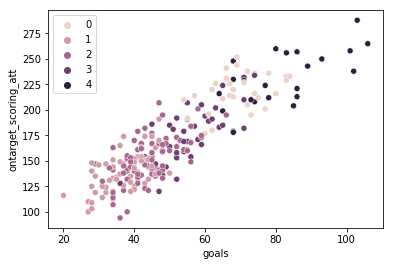

In [44]:
sns.scatterplot(data=df_group2, x="goals", y="ontarget_scoring_att", hue=kmeans2.labels_)

In [45]:
df_group3 = df[["corner_taken", "goals"]]

In [46]:
kmeans3 = KMeans(n_clusters=2)

In [47]:
kmeans3.fit(df_group1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [48]:
kmeans3.labels_

array([0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

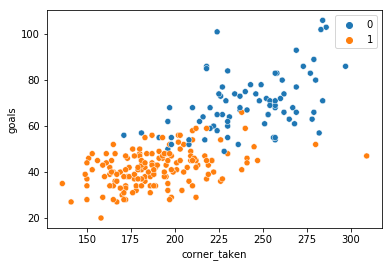

In [49]:
sns.scatterplot(data=df_group3, x="corner_taken", y="goals", hue=kmeans3.labels_)

In [50]:
df_group4 = df[["penalty_conceded", "penalty_save"]]

In [51]:
kmeans4 = KMeans(n_clusters=5)

In [52]:
kmeans4.fit(df_group1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [53]:
kmeans4.labels_

array([0, 0, 3, 3, 2, 2, 2, 4, 2, 2, 4, 1, 2, 4, 4, 1, 1, 1, 4, 1, 0, 0,
       0, 3, 2, 2, 2, 2, 2, 4, 4, 1, 4, 4, 1, 4, 1, 1, 1, 1, 0, 0, 0, 3,
       2, 2, 4, 2, 4, 4, 4, 4, 1, 4, 4, 1, 1, 1, 1, 1, 0, 0, 3, 3, 2, 3,
       2, 2, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 0, 3, 3, 3, 2, 2, 2, 4,
       4, 4, 4, 4, 4, 4, 4, 1, 1, 4, 4, 1, 0, 0, 3, 3, 2, 2, 2, 4, 4, 4,
       4, 4, 4, 4, 4, 1, 1, 1, 4, 1, 0, 3, 3, 3, 3, 2, 2, 4, 4, 4, 1, 4,
       4, 4, 4, 4, 4, 1, 1, 1, 0, 0, 0, 3, 3, 3, 2, 4, 2, 4, 4, 4, 1, 1,
       1, 1, 1, 1, 1, 4, 0, 3, 3, 3, 2, 2, 2, 2, 2, 4, 4, 4, 1, 4, 1, 1,
       1, 1, 1, 4, 0, 3, 2, 2, 3, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1,
       4, 1, 0, 0, 3, 3, 3, 3, 2, 4, 1, 4, 4, 1, 4, 4, 1, 4, 1, 1, 1, 1,
       0, 0, 3, 3, 3, 2, 2, 4, 4, 4, 4, 4, 1, 4, 4, 1, 1, 4, 1, 1],
      dtype=int32)

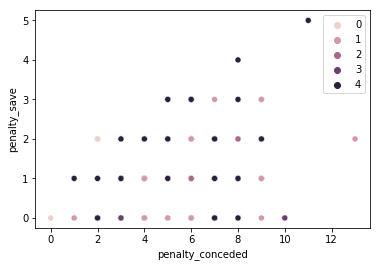

In [54]:
sns.scatterplot(data=df_group4, x="penalty_conceded", y="penalty_save", hue=kmeans4.labels_)

In [55]:
df_group5 = df[["total_offside", "total_pass"]]

In [56]:
kmeans5 = KMeans(n_clusters=5)

In [58]:
kmeans5.fit(df_group5)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [59]:
kmeans5.labels_

array([4, 2, 2, 4, 1, 3, 3, 1, 3, 3, 3, 3, 1, 3, 1, 3, 3, 3, 3, 3, 2, 2,
       4, 2, 3, 3, 3, 1, 1, 1, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4,
       3, 1, 2, 2, 2, 1, 3, 3, 3, 1, 1, 1, 3, 1, 3, 1, 4, 4, 4, 1, 4, 2,
       3, 1, 1, 3, 2, 3, 3, 3, 1, 3, 1, 1, 1, 3, 4, 4, 2, 4, 2, 2, 1, 3,
       1, 3, 1, 1, 3, 2, 1, 1, 1, 1, 1, 1, 0, 4, 4, 4, 1, 4, 1, 2, 4, 1,
       1, 0, 3, 1, 2, 1, 1, 3, 3, 1, 4, 4, 4, 0, 2, 2, 4, 1, 3, 2, 1, 4,
       1, 1, 2, 3, 3, 2, 3, 1, 0, 4, 4, 0, 4, 2, 4, 2, 4, 3, 1, 0, 3, 1,
       1, 1, 1, 1, 1, 1, 4, 0, 4, 0, 4, 4, 4, 2, 1, 3, 4, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 0, 4, 4, 4, 2, 4, 1, 2, 4, 4, 1, 2, 1, 2, 3, 1, 1,
       3, 1, 4, 4, 0, 0, 0, 4, 2, 2, 1, 1, 4, 2, 3, 1, 3, 1, 1, 2, 3, 2,
       0, 4, 0, 0, 0, 0, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 3, 1],
      dtype=int32)

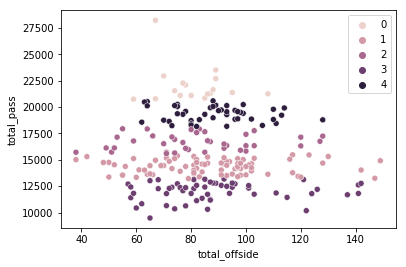

In [60]:
sns.scatterplot(data=df_group5, x="total_offside", y="total_pass", hue=kmeans5.labels_)